## Imports

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates
from dateutil.relativedelta import relativedelta
import datetime

## Merging Data

In [7]:
df_num_data = pd.read_csv('data/process_1/num_data.csv')
print(df_num_data.shape)
sum = df_num_data.shape[0]

for i in range(1, 6):
    read_data = pd.read_csv('data/process_' + str(i+1) + '/num_data.csv')
    print(read_data.shape)
    sum += read_data.shape[0]
    df_num_data = df_num_data.append(read_data)
    
print("sum:", sum)
print("df:", df_num_data.shape[0])

(119062, 18)
(93618, 18)
(72401, 18)
(70294, 18)
(56807, 18)
(55594, 18)
sum: 467776
df: 467776


In [8]:
df_dot_data = pd.read_csv('data/process_1/dot_data.csv')
print(df_dot_data.shape)
sum = df_dot_data.shape[0]

for i in range(1, 6):
    read_data = pd.read_csv('data/process_' + str(i+1) + '/dot_data.csv')
    print(read_data.shape)
    sum += read_data.shape[0]
    df_dot_data = df_dot_data.append(read_data)
    
print("sum:", sum)
print("df:", df_dot_data.shape[0])

(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
sum: 0
df: 0


In [9]:
df_loss = pd.read_csv('data/process_1/loss.csv')
print(df_loss.shape)
sum = df_loss.shape[0]

for i in range(1, 6):
    read_data = pd.read_csv('data/process_' + str(i+1) + '/loss.csv')
    print(read_data.shape)
    sum += read_data.shape[0]
    df_loss = df_loss.append(read_data)
                            
print("sum:", sum)
print("df:", df_loss.shape[0])

(2963, 4)
(1255, 4)
(824, 4)
(1670, 4)
(904, 4)
(2181, 4)
sum: 9797
df: 9797


In [10]:
df_outlier = pd.read_csv('data/process_1/outlier.csv')
print(df_outlier .shape)
sum = df_outlier .shape[0]

for i in range(1, 6):
    read_data = pd.read_csv('data/process_' + str(i+1) + '/outlier.csv')
    print(read_data.shape)
    sum += read_data.shape[0]
    df_outlier = df_outlier.append(read_data)
                            
print("sum:", sum)
print("df:", df_outlier.shape[0])

(7878, 5)
(4755, 5)


C:\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


(4219, 5)
(4458, 5)
(3187, 5)
(2066, 5)
sum: 26563
df: 26563


In [11]:
# total number of ionograms processed
df_num_data.shape[0] + df_dot_data.shape[0] + df_loss.shape[0] + df_outlier.shape[0]

504136

In [12]:
df_num_data.head()

Unnamed: 0                                         file_name      fmin  \
0           0    D:/master/leftside_data\R014207938\907-A\1.png  1.709677   
1           1   D:/master/leftside_data\R014207938\907-A\10.png  1.645161   
2           2  D:/master/leftside_data\R014207938\907-A\100.png  1.701613   
3           3  D:/master/leftside_data\R014207938\907-A\101.png  1.685484   
4           4  D:/master/leftside_data\R014207938\907-A\102.png  1.681452   

     max_depth subdir_name  satellite_number  year  day_1  day_2  day_3  \
0   974.545455       907-A                 1     3      1      4      5   
1  1032.727273       907-A                 1     3      1      4      5   
2   989.090909       907-A                 1     3      1      4      6   
3  1080.000000       907-A                 1     3      1      4      6   
4   203.636364       907-A                 1     3      1      4      6   

   hour_1  hour_2  minute_1  minute_2  second_1  second_2  station_number_1  \
0       1       6         4         8         0         1                 0   
1       1       6         5         0         5         8                 0   
2       0       8         3         4         2         1                 0   
3       0       8         3         4         3         8                 0   
4       0       8         3         4         5         8                 0   

   station_number_2  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1

# Outliers

505
30365
437411
% error: 6.491354836502942


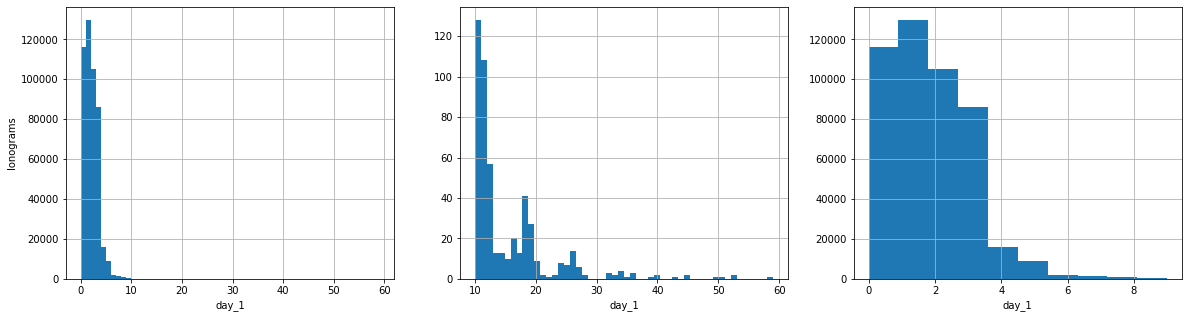

In [13]:
# day_1 (should be 0-3)
fig = plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
ax = df_num_data['day_1'].hist(bins=60)
ax.set_ylabel("Ionograms")
ax.set_xlabel("day_1")

# day_1 outliers above 10
plt.subplot(1, 3, 2)
ax = df_num_data[df_num_data['day_1']>=10]['day_1'].hist(bins=50)
ax.set_xlabel("day_1")

# day_1 below 10
plt.subplot(1, 3, 3)
ax = df_num_data[df_num_data['day_1']<10]['day_1'].hist(bins=10)
ax.set_xlabel("day_1")

print(df_num_data[df_num_data['day_1']>=10].shape[0])
print(df_num_data[df_num_data['day_1']>3].shape[0])
print(df_num_data[df_num_data['day_1']<=3].shape[0])

print("% error:", 100 * df_num_data[df_num_data['day_1']>3].shape[0] / df_num_data.shape[0])

474
27328
440448
% error: 5.842112464085374


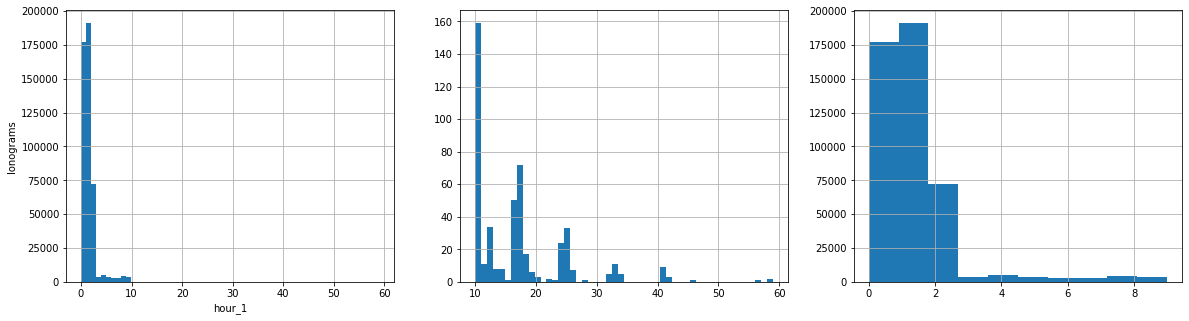

In [14]:
# hour_1 (should be 0-2)
fig = plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
ax = df_num_data['hour_1'].hist(bins=60)
ax.set_ylabel("Ionograms")
ax.set_xlabel("hour_1")

# # hour_1 outliers above 10
plt.subplot(1, 3, 2)
df_num_data[df_num_data['hour_1']>=10]['hour_1'].hist(bins=50)
ax.set_xlabel("hour_1")

# # hour_1 outliers below 10
plt.subplot(1, 3, 3)
df_num_data[df_num_data['hour_1']<10]['hour_1'].hist(bins=10)
ax.set_xlabel("hour_1")

print(df_num_data[df_num_data['hour_1']>=10].shape[0])
print(df_num_data[df_num_data['hour_1']>2].shape[0])
print(df_num_data[df_num_data['hour_1']<=2].shape[0])

print("% error:", 100 * df_num_data[df_num_data['hour_1']>2].shape[0] / df_num_data.shape[0])

1102
12515
455261
% error: 2.6754258448488164


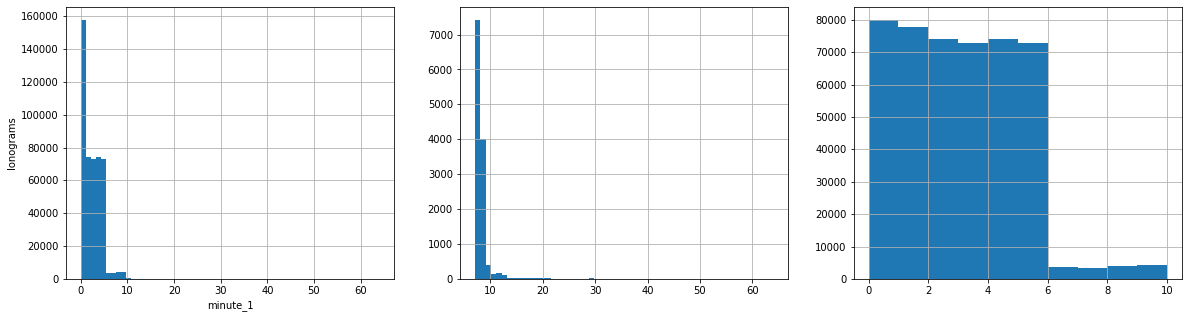

In [15]:
# minute_1 (should be 0-6)
fig = plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
ax = df_num_data['minute_1'].hist(bins=60)
ax.set_ylabel("Ionograms")
ax.set_xlabel("minute_1")

plt.subplot(1, 3, 2)
df_num_data[df_num_data['minute_1']>6]['minute_1'].hist(bins=55)
ax.set_xlabel("minute_1")

plt.subplot(1, 3, 3)
df_num_data[df_num_data['minute_1']<=10]['minute_1'].hist(bins=10)
ax.set_xlabel("minute_1")

print(df_num_data[df_num_data['minute_1']>=10].shape[0])
print(df_num_data[df_num_data['minute_1']>6].shape[0])
print(df_num_data[df_num_data['minute_1']<=6].shape[0])

print("% error:", 100 * df_num_data[df_num_data['minute_1']>6].shape[0] / df_num_data.shape[0])

634
467142
% error: 0.13553495690244904


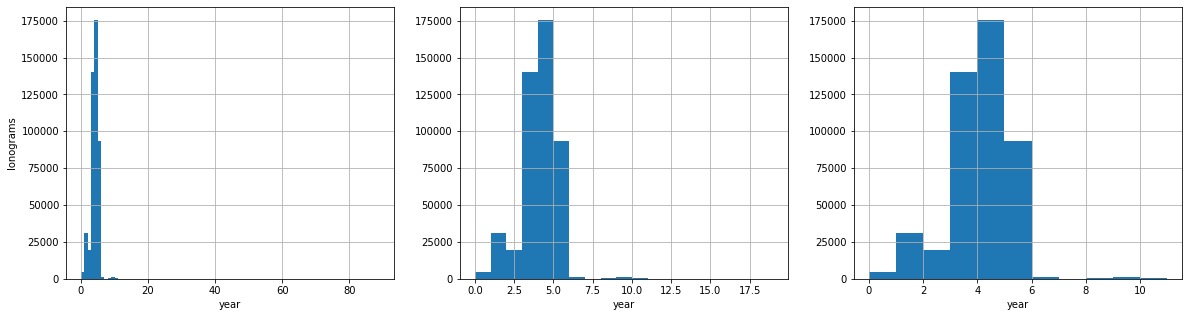

In [16]:
# year (should be 0-10)
fig = plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
ax = df_num_data['year'].hist(bins=range(0,90))
ax.set_xlabel("year")
ax.set_ylabel("Ionograms")

plt.subplot(1, 3, 2)
ax = df_num_data[df_num_data['year'] < 20]['year'].hist(bins=range(0,20))
ax.set_xlabel("year")

plt.subplot(1, 3, 3)
ax = df_num_data[df_num_data['year'] <= 11]['year'].hist(bins=range(0,12))
ax.set_xlabel("year")

print(df_num_data[df_num_data['year']>10].shape[0])
print(df_num_data[df_num_data['year']<=10].shape[0])

print("% error:", 100 * df_num_data[df_num_data['year']>10].shape[0] / df_num_data.shape[0])

15068
452708
% error: 3.2211998905459023


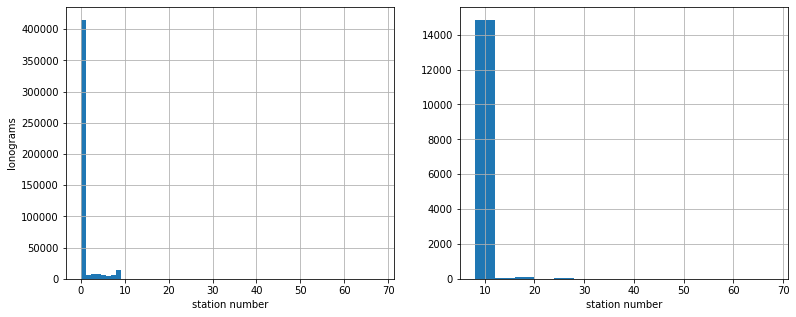

In [17]:
# station number 1 (should be 0-7)
fig = plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
ax = df_num_data['station_number_1'].hist(bins=60)
ax.set_xlabel("station number")
ax.set_ylabel("Ionograms")

plt.subplot(1, 3, 2)
ax = df_num_data[df_num_data['station_number_1'] > 7]['station_number_1'].hist(bins=15)
ax.set_xlabel("station number")

print(df_num_data[df_num_data['station_number_1']>7].shape[0])
print(df_num_data[df_num_data['station_number_1']<=7].shape[0])

print("% error:", 100 * df_num_data[df_num_data['station_number_1']>7].shape[0] / df_num_data.shape[0])

14487
421789
% error: 9.830987481187577


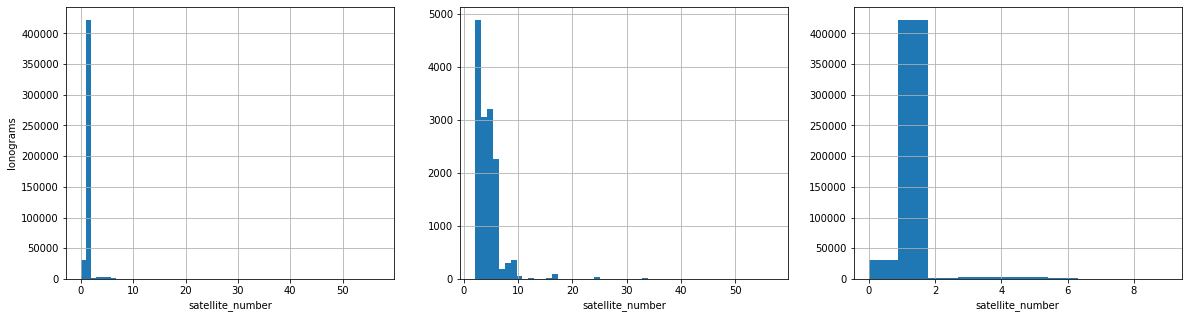

In [18]:
# satellite number (should be 1)
fig = plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
ax = df_num_data['satellite_number'].hist(bins=60)
ax.set_xlabel("satellite_number")
ax.set_ylabel("Ionograms")

plt.subplot(1, 3, 2)
ax = df_num_data[df_num_data['satellite_number'] > 1]['satellite_number'].hist(bins=50)
ax.set_xlabel("satellite_number")

plt.subplot(1, 3, 3)
ax = df_num_data[df_num_data['satellite_number'] < 10]['satellite_number'].hist(bins=10)
ax.set_xlabel("satellite_number")

print(df_num_data[df_num_data['satellite_number']>1].shape[0])
print(df_num_data[df_num_data['satellite_number']==1].shape[0])

print("% error:", 100 * df_num_data[df_num_data['satellite_number']!=1].shape[0] / df_num_data.shape[0])

## Output data


In [19]:
df_num_data.to_csv("data/all_num_data.csv")
df_dot_data.to_csv("data/all_dot_data.csv")
df_loss.to_csv("data/all_loss.csv")
df_outlier.to_csv("data/all_outlier.csv")

In [ ]:
df_num_data = pd.read_csv("data/all_num_data.csv")

## Combine columns

In [20]:
df_num_data['day'] = df_num_data.apply(lambda x: int(str(x['day_1']) + str(x['day_2']) + str(x['day_3'])), axis=1)
df_num_data['hour'] = df_num_data.apply(lambda x: int(str(x['hour_1']) + str(x['hour_2'])), axis=1)
df_num_data['minute'] = df_num_data.apply(lambda x: int(str(x['minute_1']) + str(x['minute_2'])), axis=1)
df_num_data['second'] = df_num_data.apply(lambda x: int(str(x['second_1']) + str(x['second_2'])), axis=1)
df_num_data['station_number'] = df_num_data.apply(lambda x: int(str(x['station_number_1']) + str(x['station_number_2'])), axis=1)

In [21]:
df_num_data.head()

Unnamed: 0                                         file_name      fmin  \
0           0    D:/master/leftside_data\R014207938\907-A\1.png  1.709677   
1           1   D:/master/leftside_data\R014207938\907-A\10.png  1.645161   
2           2  D:/master/leftside_data\R014207938\907-A\100.png  1.701613   
3           3  D:/master/leftside_data\R014207938\907-A\101.png  1.685484   
4           4  D:/master/leftside_data\R014207938\907-A\102.png  1.681452   

     max_depth subdir_name  satellite_number  year  day_1  day_2  day_3  ...  \
0   974.545455       907-A                 1     3      1      4      5  ...   
1  1032.727273       907-A                 1     3      1      4      5  ...   
2   989.090909       907-A                 1     3      1      4      6  ...   
3  1080.000000       907-A                 1     3      1      4      6  ...   
4   203.636364       907-A                 1     3      1      4      6  ...   

   minute_2  second_1  second_2  station_number_1  station_number_2  day  \
0         8         0         1                 0                 1  145   
1         0         5         8                 0                 1  145   
2         4         2         1                 0                 1  146   
3         4         3         8                 0                 1  146   
4         4         5         8                 0                 1  146   

   hour  minute  second  station_number  
0    16      48       1               1  
1    16      50      58               1  
2     8      34      21               1  
3     8      34      38               1  
4     8      34      58               1  

[5 rows x 23 columns]

In [22]:
rows = df_num_data.shape[0]
print("Rows in unfiltered df:", rows)
print()

filtered_df = df_num_data[df_num_data.year <= 12]
print("Errors in 'year':", rows - filtered_df.shape[0])
rows = filtered_df.shape[0]

filtered_df = filtered_df[filtered_df.day <= 365]
print("Errors in 'day':", rows - filtered_df.shape[0])
rows = filtered_df.shape[0]

filtered_df = filtered_df[filtered_df.hour <= 24]
print("Errors in 'hour':", rows - filtered_df.shape[0])
rows = filtered_df.shape[0]

filtered_df = filtered_df[filtered_df.minute <= 60]
print("Errors in 'minute':", rows - filtered_df.shape[0])
rows = filtered_df.shape[0]

filtered_df = filtered_df[filtered_df.second <= 60]
print("Errors in 'second':", rows - filtered_df.shape[0])
rows = filtered_df.shape[0]

filtered_df = filtered_df[filtered_df.station_number <= 99]
print("Errors in 'station_number':", rows - filtered_df.shape[0])
rows = filtered_df.shape[0]

filtered_df = filtered_df[filtered_df.satellite_number == 1]
print("Errors in 'satellite_number':", rows - filtered_df.shape[0])
rows = filtered_df.shape[0]

print()
print("Rows in filtered df:", rows)
print("Total error rate:", 100 - 100 * rows / df_num_data.shape[0])

Rows in unfiltered df: 467776

Errors in 'year': 258
Errors in 'day': 32383
Errors in 'hour': 8860
Errors in 'minute': 4337
Errors in 'second': 8107
Errors in 'station_number': 194
Errors in 'satellite_number': 6332

Rows in filtered df: 407305
Total error rate: 12.92734129155835


## Convert to datetime object

In [23]:
filtered_df2 = filtered_df.copy()

filtered_df['timestamp'] = filtered_df.apply(lambda x: datetime.datetime(year=1962, month=1, day=1) + \
                  relativedelta(years=x['year'], days=x['day']-1, hours=x['hour'], minutes=x['minute'], seconds=x['second']), axis=1)

filtered_df2['timestamp'] = filtered_df2.apply(lambda x: datetime.datetime(year=1960, month=1, day=1) + \
                  relativedelta(years=x['year'], days=x['day']-1, hours=x['hour'], minutes=x['minute'], seconds=x['second']), axis=1)

C:\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Ionograms')

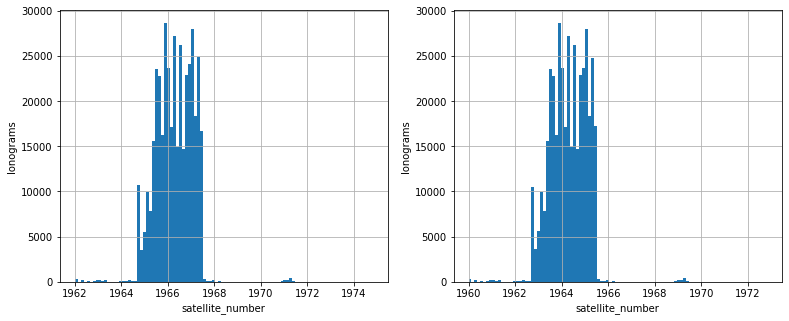

In [24]:
# 
fig = plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)

ax = filtered_df['timestamp'].hist(bins=100)

ax.set_xlabel("satellite_number")
ax.set_ylabel("Ionograms")


plt.subplot(1, 3, 2)

ax = filtered_df2['timestamp'].hist(bins=100)

ax.set_xlabel("satellite_number")
ax.set_ylabel("Ionograms")


In [25]:
print("Rows in df:", filtered_df.shape[0])

Rows in df: 407305


In [26]:
alouette_launch_date = datetime.datetime(year=1962, month=9, day=29)
alouette_deactivation_date = datetime.datetime(year=1972, month=12, day=31) # don't know eact date 

filtered_df = filtered_df[filtered_df.timestamp >= alouette_launch_date]
print("Errors in timestamp (date too early):", rows - filtered_df.shape[0])
rows = filtered_df.shape[0]

filtered_df = filtered_df[filtered_df.timestamp <= alouette_deactivation_date]
print("Errors in timestamp (date too late):", rows - filtered_df.shape[0])

print("Total error rate:", 100 - 100 * rows / filtered_df.shape[0])

Errors in timestamp (date too early): 669
Errors in timestamp (date too late): 70
Total error rate: -0.017217376760470415


In [27]:
filtered_df2 = filtered_df2[filtered_df2.timestamp >= alouette_launch_date]
print("Errors in timestamp (date too early):", rows - filtered_df2.shape[0])
rows = filtered_df2.shape[0]

filtered_df2 = filtered_df2[filtered_df2.timestamp <= alouette_deactivation_date]
print("Errors in timestamp (date too late):", rows - filtered_df2.shape[0])

print("Total error rate:", 100 - 100 * rows / filtered_df2.shape[0])

Errors in timestamp (date too early): 1464
Errors in timestamp (date too late): 0
Total error rate: 0.0


Text(0, 0.5, 'Ionograms')

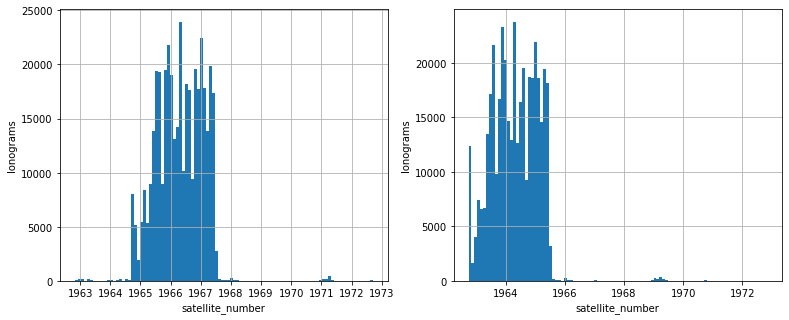

In [28]:
# 
fig = plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)

ax = filtered_df['timestamp'].hist(bins=100)

ax.set_xlabel("satellite_number")
ax.set_ylabel("Ionograms")


plt.subplot(1, 3, 2)

ax = filtered_df2['timestamp'].hist(bins=100)

ax.set_xlabel("satellite_number")
ax.set_ylabel("Ionograms")

In [41]:
# Match station_numbers with their respective station names and locations
df_stations = pd.read_csv("data/station_codes.csv")

df_stations.columns = ['station_name', 'station_number', 'before_07_01_1965','3_letter_code', 'lat', 'lon']
df_stations.astype({'station_number': 'int32'}).dtypes

stations_dict=df_stationscsvict('list')

In [42]:
df_stations.astype({'station_name': 'str'}).dtypes

station_name         object
station_number        int64
before_07_01_1965     int64
3_letter_code        object
lat                  object
lon                  object
dtype: object

In [43]:
stations_dict['station_number'].index(6)
stations_dict['station_name'][0]

'Antofagasta, Chile'

In [44]:
#filtered_df.astype({'station_number': 'int32'}).dtypes
filtered_df.columns

Index(['Unnamed: 0', 'file_name', 'fmin', 'max_depth', 'subdir_name',
       'satellite_number', 'year', 'day_1', 'day_2', 'day_3', 'hour_1',
       'hour_2', 'minute_1', 'minute_2', 'second_1', 'second_2',
       'station_number_1', 'station_number_2', 'day', 'hour', 'minute',
       'second', 'station_number', 'timestamp'],
      dtype='object')

In [45]:
type(get_station_name(1, datetime.datetime.strptime('1965-05-25 16:48:01','%Y-%m-%d %H:%M:%S')))

tuple

In [46]:
df = pd.DataFrame([[1, 2], [3, 4], [5, 6]], index=['a', 'b', 'c'], columns=['A', 'B'])
df['C'] = "Hello" 
type(df['C'][0])

str

In [47]:
df_stations["station_name"] = df_stations["station_name"].astype(str, errors='raise')

In [73]:
def get_station_name(station_number, timestamp):
    # print(station_number, timestamp)
    if timestamp >= datetime.datetime(year=1965, month=7, day=1) and station_number in stations_dict['station_number']:
        name = stations_dict['station_name'][stations_dict['station_number'].index(station_number)]
        code = stations_dict['3_letter_code'][stations_dict['station_number'].index(station_number)]
        lat = stations_dict['lat'][stations_dict['station_number'].index(station_number)]
        lon = stations_dict['lon'][stations_dict['station_number'].index(station_number)]
    elif timestamp < datetime.datetime(year=1965, month=7, day=1) and station_number in stations_dict['before_07_01_1965']:
        name = stations_dict['station_name'][stations_dict['before_07_01_1965'].index(station_number)]
        code = stations_dict['3_letter_code'][stations_dict['before_07_01_1965'].index(station_number)]
        lat = stations_dict['lat'][stations_dict['before_07_01_1965'].index(station_number)]
        lon = stations_dict['lon'][stations_dict['before_07_01_1965'].index(station_number)]
    elif timestamp < datetime.datetime(year=1963, month=4, day=25) and station_number == 10:
        name = stations_dict['station_name'][stations_dict['station_name'].index('Winkfield, England')]
        code = stations_dict['3_letter_code'][stations_dict['station_name'].index('Winkfield, England')]
        lat = stations_dict['lat'][stations_dict['station_name'].index('Winkfield, England')]
        lon = stations_dict['lon'][stations_dict['station_name'].index('Winkfield, England')]
        
    # assumption, need to look into these:
    elif timestamp >= datetime.datetime(year=1965, month=7, day=1) and station_number == 9:
        name = stations_dict['station_name'][stations_dict['station_name'].index('South Atlantic, Falkland Islands')]
        code = stations_dict['3_letter_code'][stations_dict['station_name'].index('South Atlantic, Falkland Islands')]
        lat = stations_dict['lat'][stations_dict['station_name'].index('South Atlantic, Falkland Islands')]
        lon = stations_dict['lon'][stations_dict['station_name'].index('South Atlantic, Falkland Islands')]
    elif timestamp >= datetime.datetime(year=1965, month=7, day=1) and station_number == 7:
        name = stations_dict['station_name'][stations_dict['station_name'].index('Quito, Ecuador')]
        code = stations_dict['3_letter_code'][stations_dict['station_name'].index('Quito, Ecuador')]
        lat = stations_dict['lat'][stations_dict['station_name'].index('Quito, Ecuador')]
        lon = stations_dict['lon'][stations_dict['station_name'].index('Quito, Ecuador')]
    elif timestamp >= datetime.datetime(year=1965, month=7, day=1) and station_number == 4:
        name = stations_dict['station_name'][stations_dict['station_name'].index("St. John's, Newfoundland")]
        code = stations_dict['3_letter_code'][stations_dict['station_name'].index("St. John's, Newfoundland")]
        lat = stations_dict['lat'][stations_dict['station_name'].index("St. John's, Newfoundland")]
        lon = stations_dict['lon'][stations_dict['station_name'].index("St. John's, Newfoundland")]
    else:
        name = None
        code = None
        lat = None
        lon = None
    
    #if len([name, code, lat, lon]) != 4:
        
    return name, code, lat, lon


In [116]:
#station_values = filtered_df.apply(lambda x: get_station_name(x['station_number'], x['timestamp']), axis=1)

filtered_df['station_name'] = None
filtered_df['3_letter_code'] = None
filtered_df['lat'] = None
filtered_df['lon'] = None

for i in range(len(filtered_df.index)):
    station_values = get_station_name(filtered_df.iloc[i]['station_number'], filtered_df.iloc[i]['timestamp'])
    
    filtered_df.iloc[i, filtered_df.columns.get_loc('station_name')] = station_values[0]
    filtered_df.iloc[i, filtered_df.columns.get_loc('3_letter_code')] = station_values[1]
    filtered_df.iloc[i, filtered_df.columns.get_loc('lat')] = station_values[2]
    filtered_df.iloc[i, filtered_df.columns.get_loc('lon')] = station_values[3]
    
#filtered_df['station_name'], filtered_df['3_letter_code'], filtered_df['lat'], filtered_df['lon'] = 

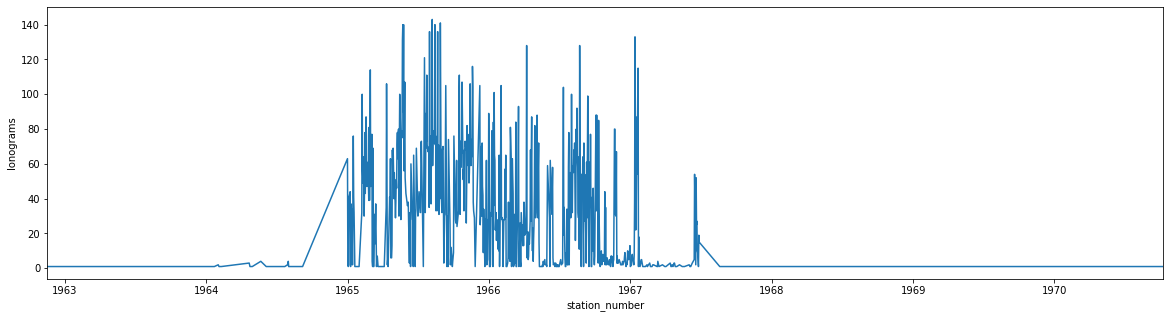

In [288]:
fig = plt.figure(figsize=(20, 5))

ax = filtered_df[filtered_df['station_number'] == 4].apply(lambda x: x['timestamp'].date(), axis=1).value_counts().plot()

ax.set_xlabel("station_number")
ax.set_ylabel("Ionograms")
add_value_labels(ax)

In [137]:
print(filtered_df.isnull().sum())
print(len(filtered_df.index))

Unnamed: 0              0
file_name               0
fmin                    0
max_depth               0
subdir_name             0
satellite_number        0
year                    0
day_1                   0
day_2                   0
day_3                   0
hour_1                  0
hour_2                  0
minute_1                0
minute_2                0
second_1                0
second_2                0
station_number_1        0
station_number_2        0
day                     0
hour                    0
minute                  0
second                  0
station_number          0
timestamp               0
station_name        12491
3_letter_code       14045
lat                 12491
lon                 12491
dtype: int64
406566


In [138]:
# function from https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = y_value

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),# Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

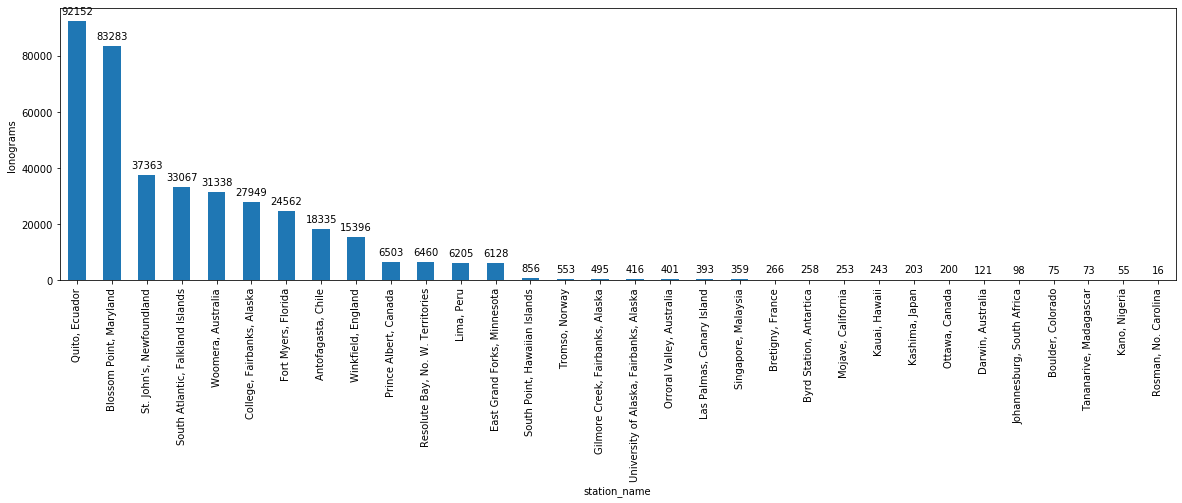

In [139]:
fig = plt.figure(figsize=(20, 5))

ax = filtered_df['station_name'].value_counts().plot.bar()

ax.set_xlabel("station_name")
ax.set_ylabel("Ionograms")
add_value_labels(ax)

In [140]:
filtered_df['station_name'].value_counts()
# St John's amd Santiago don't show up anywhere

Quito, Ecuador                             92152
Blossom Point, Maryland                    83283
St. John's, Newfoundland                   37363
South Atlantic, Falkland Islands           33067
Woomera, Australia                         31338
College, Fairbanks, Alaska                 27949
Fort Myers, Florida                        24562
Antofagasta, Chile                         18335
Winkfield, England                         15396
Prince Albert, Canada                       6503
Resolute Bay, No. W. Territories            6460
Lima, Peru                                  6205
East Grand Forks, Minnesota                 6128
South Point, Hawaiian Islands                856
Tromso, Norway                               553
Gilmore Creek, Fairbanks, Alaska             495
University of Alaska, Fairbanks, Alaska      416
Orroral Valley, Australia                    401
Las Palmas, Canary Island                    393
Singapore, Malaysia                          359
Bretigny, France    

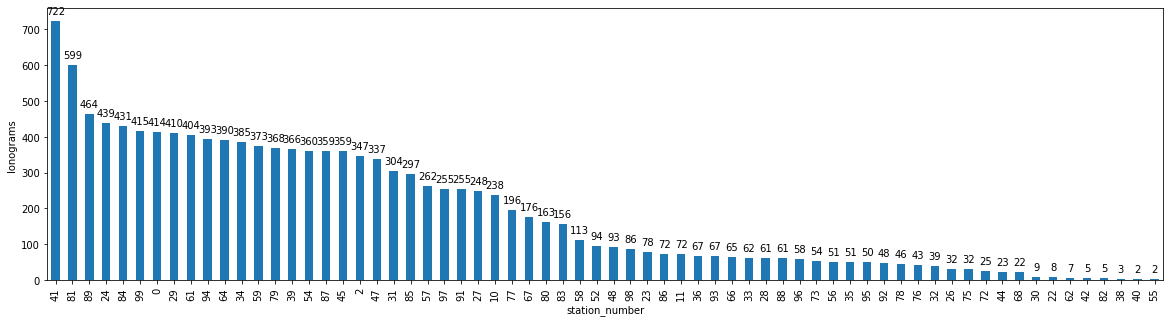

In [141]:
fig = plt.figure(figsize=(20, 5))

ax = filtered_df[filtered_df['station_name'].isnull()]['station_number'].value_counts().plot.bar()

ax.set_xlabel("station_number")
ax.set_ylabel("Ionograms")
add_value_labels(ax)

In [265]:
#filtered_df[filtered_df['station_number'] == 7].apply(lambda x: x['timestamp'].date(), axis=1)

In [279]:
datetime.month(filtered_df.iloc[26338]['timestamp'].date())

AttributeError: module 'datetime' has no attribute 'month'

In [143]:
print(type(list(filtered_df['station_name'])[0]))
print(type(list(df_stations['station_name'])[0]))

<class 'str'>
<class 'str'>


In [145]:
initial_df_size = 467776
total_error_rate = 100 * (1 - len(filtered_df.dropna().index) / initial_df_size)

print("Final df size:", len(filtered_df.dropna().index))
print("Total error rate: " + str(total_error_rate) + '%')

Final df size: 392521
Total error rate: 16.087828362293067%


Text(0.5, 0, 'fmin')

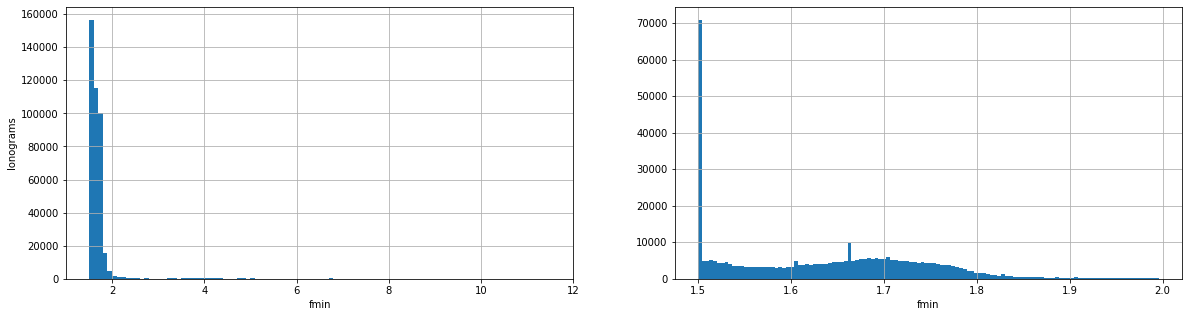

In [150]:
# fmin
fig = plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
ax = filtered_df['fmin'].hist(bins=100)
ax.set_xlabel("fmin")
ax.set_ylabel("Ionograms")

plt.subplot(1, 2, 2)
ax = filtered_df[filtered_df['fmin'] < 2]['fmin'].hist(bins=120)
ax.set_xlabel("fmin")

Text(0.5, 0, 'Ionograms')

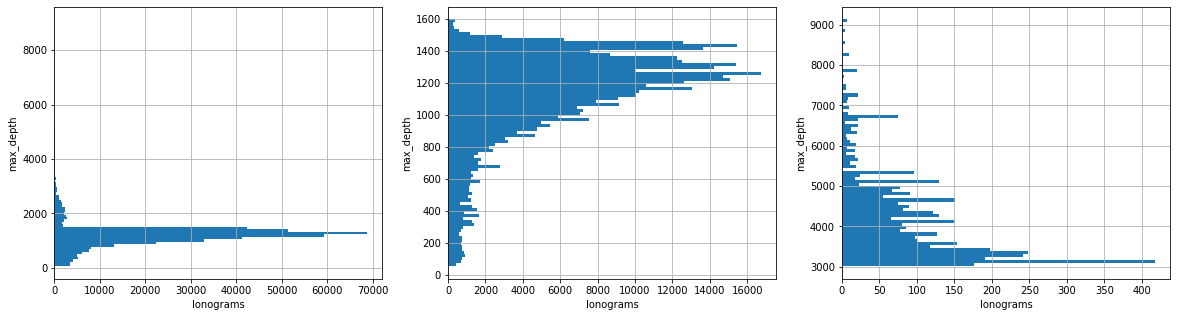

In [151]:
# max depth
fig = plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
ax = filtered_df['max_depth'].hist(bins=100, orientation='horizontal')
ax.set_ylabel("max_depth")
ax.set_xlabel("Ionograms")

plt.subplot(1, 3, 2)
ax = filtered_df[filtered_df['max_depth'] < 1600]['max_depth'].hist(bins=80, orientation='horizontal')
ax.set_ylabel("max_depth")
ax.set_xlabel("Ionograms")

plt.subplot(1, 3, 3)
ax = filtered_df[filtered_df['max_depth'] > 3000]['max_depth'].hist(bins=80, orientation='horizontal')
ax.set_ylabel("max_depth")
ax.set_xlabel("Ionograms")

### Fix file naming

In [206]:
#def fix_file_name(file_name):

# dir_0 = []
# dir_1 = []
# dir_2 = []
# dir_3 = []

#     file_array = filtered_df.iloc[i]['file_name'].replace('\\', '/').split('/')
#     file_array[-3:]

In [209]:
df_final = filtered_df.copy()
df_final['file_name'] = filtered_df.apply(lambda x: '/'.join(x['file_name'].replace('\\', '/').split('/')[-3:])[:-4], axis=1)

#ftp://ftp.asc-csa.gc.ca/users/OpenData_DonneesOuvertes/pub/AlouetteData/Alouette%20Data/R014207815/3488-15A/1.png

### Drop unnecessary columns

In [220]:
df_final.columns
df_final = df_final.drop(columns=['Unnamed: 0', 'year', 'day_1', 'day_2', 'day_3', 'hour_1','hour_2', 'minute_1', 'minute_2',\
                        'second_1', 'second_2','station_number_1', 'station_number_2', 'day', 'hour', 'minute','second'])

## Export final dateframe

In [294]:
len(df_final.index)

406566

In [293]:
df_final.to_csv("data/final_alouette_data.csv")

# Summary of results

In [7]:
df_final_2 = pd.read_csv("data/final_alouette_data.csv")

In [15]:
df_final_2.isnull().sum()

Unnamed: 0              0
file_name               0
fmin                    0
max_depth               0
subdir_name             0
satellite_number        0
station_number          0
timestamp               0
station_name        12491
3_letter_code       14045
lat                 12491
lon                 12491
dtype: int64

In [14]:
len(df_final_2.index) - df_final_2["station_name"].isnull().sum()

394075

Total # of ionograms processed correctly are 394075. This is down from 504136 total ionograms with leftside metadata before processing the data. 9797 ionograms were recored as loss and an additional 26563 were recorded as outliers when going through the image processing pipeline. The reminaing ionograms were checked for their validity in this notebook via removing those that contain impossible metadata values and those with invalid station numbers. 

NOTE: Ionograms with metadata on the bottom are not included and were not processed as the image processing pipeline cannot yet process those.

In [24]:
print("The overall success rate of Alouette-I ionogram processing is " + str(round(100 * 394075 / 504136, 1)) + "%")

The overall success rate of Alouette-I ionogram processing is 78.2%


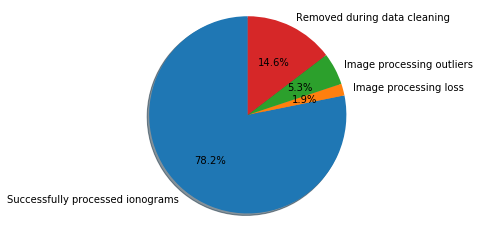

In [27]:
# Pie chart
labels = 'Successfully processed ionograms', 'Image processing loss', 'Image processing outliers', 'Removed during data cleaning'
sizes = [394075, 9797, 26563, 73701]
#explode = (0, 0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()